# CME538 - Introduction to Data Science
## Lecture 6.2 - Gradient Descent I

## Setup Notebook

In [5]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pylab as plt
from ipywidgets import interact, fixed, IntSlider

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Import Tips Data
Let's import out tips dataset from `Seaborn`.

In [6]:
tips = sns.load_dataset('tips')
tips = tips.iloc[0:-1]
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Add a column representing the tip percentage.

In [7]:
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Text(0.5, 0, 'Tip Percentage')

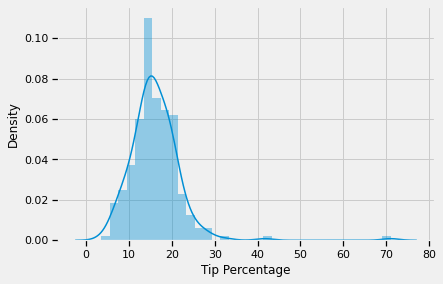

In [8]:
ax = sns.distplot(tips['tip_pct'])
ax.set_xlabel('Tip Percentage')

# Gradient Descent

In [9]:
def mse(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

def grad_mse(theta, y_vals):
    return -2 * np.mean(y_vals - theta)

In [10]:
def minimize(loss_fn, grad_loss_fn, dataset, alpha=0.2, progress=True):
    """
    Uses gradient descent to minimize loss_fn. 
    Returns the minimizing value of theta once 
    theta changes less than 0.001 between iterations.
    """
    # Set starting theta
    theta = 0
    
    # Set starting epoch
    epoch = 0
    
    while True:
        
        # Calculate the loss
        loss = loss_fn(theta, dataset)
        
        if progress:
            print('epoch: {} | theta: {} | loss: {}'.format(epoch, 
                                                            theta, 
                                                            loss))
        
        # Compute gradient
        gradient = grad_loss_fn(theta, dataset)
        
        # Get new theta
        new_theta = theta - alpha * gradient
        
        # Check for convergence
        if abs(new_theta - theta) < 0.001:
            return new_theta
        
        # Update theta
        theta = new_theta
        
        # Update epoch
        epoch += 1
        
    else:
        return theta 

In [11]:
%%time
theta = minimize(loss_fn=mse, 
                 grad_loss_fn=grad_mse, 
                 dataset=tips['tip_pct'].values, 
                 alpha=0.2, progress=True)

print('\nMinimizing theta: {}'.format(theta))
print()

epoch: 0 | theta: 0 | loss: 295.8868027393047
epoch: 1 | theta: 6.4322774537194185 | loss: 130.390029772796
epoch: 2 | theta: 10.29164392595107 | loss: 70.81119150485289
epoch: 3 | theta: 12.60726380929006 | loss: 49.362809728393366
epoch: 4 | theta: 13.996635739293454 | loss: 41.64139228886794
epoch: 5 | theta: 14.83025889729549 | loss: 38.8616820106388
epoch: 6 | theta: 15.330432792096712 | loss: 37.86098631047629
epoch: 7 | theta: 15.630537128977444 | loss: 37.5007358584178
epoch: 8 | theta: 15.810599731105885 | loss: 37.371045695676735
epoch: 9 | theta: 15.918637292382948 | loss: 37.32435723708996
epoch: 10 | theta: 15.983459829149187 | loss: 37.30754939199872
epoch: 11 | theta: 16.02235335120893 | loss: 37.30149856776586
epoch: 12 | theta: 16.045689464444777 | loss: 37.29932027104205
epoch: 13 | theta: 16.059691132386284 | loss: 37.29853608422146
epoch: 14 | theta: 16.06809213315119 | loss: 37.298253776966064
epoch: 15 | theta: 16.07313273361013 | loss: 37.29815214635412
epoch: 16

In [8]:
%%time
theta = minimize(loss_fn=mse, 
                 grad_loss_fn=grad_mse, 
                 dataset=tips['tip_pct'].values, 
                 alpha=0.9, progress=True)

print('\nMinimizing theta: {}'.format(theta))
print()

epoch: 0 | theta: 0 | loss: 295.8868027393047
epoch: 1 | theta: 28.94524854173738 | loss: 202.79486794564357
epoch: 2 | theta: 5.7890497083474735 | loss: 143.21602967770048
epoch: 3 | theta: 24.314008775059403 | loss: 105.08557318621686
epoch: 4 | theta: 9.49404152168986 | loss: 80.68208103166734
epoch: 5 | theta: 21.35001532438549 | loss: 65.06384605275565
epoch: 6 | theta: 11.865236282228986 | loss: 55.068175666252195
epoch: 7 | theta: 19.45305951595419 | loss: 48.67094661888996
epoch: 8 | theta: 13.382800928974028 | loss: 44.57672002857814
epoch: 9 | theta: 18.23900779855816 | loss: 41.95641501077858
epoch: 10 | theta: 14.354042302890853 | loss: 40.279419799386844
epoch: 11 | theta: 17.4620146994247 | loss: 39.206142864096144
epoch: 12 | theta: 14.975636782197622 | loss: 38.5192456255101
epoch: 13 | theta: 16.964739115979285 | loss: 38.079631392815024
epoch: 14 | theta: 15.373457248953953 | loss: 37.79827828389018
epoch: 15 | theta: 16.646482742574218 | loss: 37.61821229417827
epoch

In [9]:
def minimize_plot_constant_model(epochs, loss_fn, grad_loss_fn, dataset, alpha=0.2):
    """
    Uses gradient descent to minimize loss_fn. Returns the minimizing value of
    theta once theta changes less than 0.001 between iterations.
    """
    # Set starting theta
    theta = 90
    
    # Set starting epoch
    epochs = np.arange(epochs)
    epochs_conv = []
    
    # Set loss array
    losses = []
    losses_conv = []
    
    # Set theta array
    thetas = []
    
    # Setup figure
    fig = plt.figure(figsize=(12, 5))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax2 = plt.subplot2grid((1, 2), (0, 1))
    
    # Plot loss 
    sns.rugplot(tips['tip_pct'].values, height=0.1, ax=ax1)
    ax1.plot(np.arange(-100, 120, 0.01), [loss_fn(val, dataset) for val in np.arange(-100, 120, 0.01)], '-')
    ax1.set_xlabel('$\\theta$', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.set_xlim([-60, 102])
    ax1.set_ylim([-1000, 8000])
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)

    for epoch in epochs:
        
        # Update losses
        losses.append(loss_fn(theta, dataset))
        
        # Update thetas
        thetas.append(theta)
        
        # Compute gradient
        gradient = grad_loss_fn(theta, dataset)
        
        # Get new theta
        new_theta = theta - alpha * gradient
        
        if abs(new_theta - theta) < 0.001:
            epochs_conv.append(epoch)
            losses_conv.append(loss_fn(theta, dataset))
          
        # Update theta
        theta = new_theta
  
    # Check for convergence
    ax2.plot(epochs, losses, '-o', markeredgecolor='k', ms=10)
    ax2.plot(epochs_conv, losses_conv, '-o', markeredgecolor='k', ms=10)
    ax2.set_xlim([-0.5, 50])
    ax2.set_ylim([-200, 8000])
    ax2.set_xlabel('Epoch', fontsize=18)
    ax2.set_ylabel('Loss', fontsize=18)
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)

    ax1.set_title('$\\theta$ = {}'.format(np.round(theta, 2), fontsize=18))
    ax1.plot(thetas, losses, '-o', markeredgecolor='k', ms=10)
    
    xs = np.arange(thetas[-1] - 30, thetas[-1] + 30, 0.05)
    ys = losses[-1] + gradient * (xs - thetas[-1])
    ax1.plot(xs, ys, zorder=0, linestyle='--', lw=2)
    
    plt.show()

In [10]:
alpha = 1.01

# Launch widget
interact(minimize_plot_constant_model,
         epochs=IntSlider(value=1, min=1, max=100, step=1),
         loss_fn=fixed(mse),
         grad_loss_fn=fixed(grad_mse),
         dataset=fixed(tips['tip_pct'].values),
         alpha=fixed(alpha));

interactive(children=(IntSlider(value=1, description='epochs', min=1), Output()), _dom_classes=('widget-intera…

# 1D Gradient  Descent

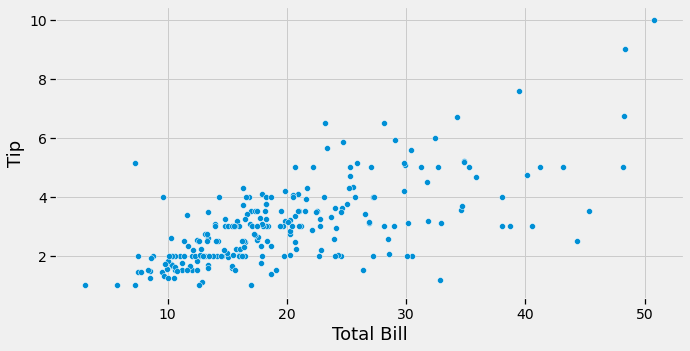

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(tips['total_bill'], tips['tip'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Total Bill', fontsize=18)
ax.set_ylabel('Tip', fontsize=18)
plt.show()

In [12]:
def mse(theta, x, y_obs):
    y_hat = theta * x
    return np.mean((y_hat - y_obs) ** 2)

def grad_mse(theta, x, y_obs):
    y_hat = theta * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [13]:
def minimize_plot_1d_model(epochs, loss_fn, grad_loss_fn, x, y_obs, alpha=0.2):
    """
    Uses gradient descent to minimize loss_fn. Returns the minimizing value of
    theta once theta changes less than 0.001 between iterations.
    """
    # Set starting theta
    theta = 90
    
    # Set starting epoch
    epochs = np.arange(epochs)
    epochs_conv = []
    
    # Set loss array
    losses = []
    losses_conv = []
    
    # Set theta array
    thetas = []
    
    # Setup figure
    fig = plt.figure(figsize=(14, 12))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    ax3 = plt.subplot2grid((2, 2), (1, 1))
    
    # Plot total_bill vs tip
    sns.scatterplot(x, y_obs, ax=ax1)
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    ax1.set_xlabel('Total Bill', fontsize=18)
    ax1.set_ylabel('Tip', fontsize=18)
    ax1.set_xlim([0, 60])
    ax1.set_ylim([0, 12])
    
    # Plot loss 
    ax2.plot(np.arange(-100, 120, 0.01), [loss_fn(val, x, y_obs) for val in np.arange(-100, 120, 0.01)], '-')
    ax2.set_xlabel('$\\theta$', fontsize=18)
    ax2.set_ylabel('Loss', fontsize=18)
    #ax2.set_xlim([-60, 102])
    #ax2.set_ylim([-1000, 8000])
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)

    for epoch in epochs:
        
        # Update losses
        losses.append(loss_fn(theta, x, y_obs))
        
        # Update thetas
        thetas.append(theta)
        
        # Compute gradient
        gradient = grad_loss_fn(theta, x, y_obs)
        
        # Get new theta
        new_theta = theta - alpha * gradient
        
        if abs(new_theta - theta) < 0.001:
            epochs_conv.append(epoch)
            losses_conv.append(loss_fn(theta, x, y_obs))
          
        # Update theta
        theta = new_theta
  
    # Check for convergence
    ax3.plot(epochs, losses, '-o', markeredgecolor='k', ms=10)
    ax3.plot(epochs_conv, losses_conv, '-o', markeredgecolor='k', ms=10)
    ax3.set_xlim([-0.5, 20])
    #ax3.set_ylim([-200, 8000])
    ax3.set_xlabel('Epoch', fontsize=18)
    ax3.set_ylabel('Loss', fontsize=18)
    ax3.xaxis.set_tick_params(labelsize=14)
    ax3.yaxis.set_tick_params(labelsize=14)

    ax2.plot(thetas, losses, '-o', markeredgecolor='k', ms=10)
    
    xs = np.arange(thetas[-1] - 30, thetas[-1] + 30, 0.05)
    ys = losses[-1] + gradient * (xs - thetas[-1])
    ax2.plot(xs, ys, zorder=0, linestyle='--', lw=2)
    
    ax1.plot(x, x*theta, linestyle='-', lw=3, color='#fc4f30')
    if len(losses_conv) > 0:
        ax1.vlines(x, ymin=y_obs, ymax=x*theta, linestyle='dashed', color='r',alpha=0.3, zorder=0)

    plt.show()

In [14]:
alpha = 0.0005

# Launch widget
interact(minimize_plot_1d_model,
         epochs=IntSlider(value=1, min=1, max=20, step=1),
         loss_fn=fixed(mse),
         grad_loss_fn=fixed(grad_mse),
         x=fixed(tips['total_bill'].values),
         y_obs=fixed(tips['tip'].values),
         alpha=fixed(alpha));

interactive(children=(IntSlider(value=1, description='epochs', max=20, min=1), Output()), _dom_classes=('widge…

# 2D Gradient  Descent (Unscaled)

In [15]:
def mse(theta0, theta1, x, y_obs):
    y_hat = theta0 + theta1 * x
    return np.mean((y_hat - y_obs) ** 2)

def grad_mse(theta0, theta1, x, y_obs):
    y_hat = theta0 + theta1 * x
    n = len(x)
    grad_0 = (-2 / n) * sum(y_obs - y_hat)
    grad_1 = (-2 / n) * sum(x * (y_obs - y_hat)) 
    return grad_0, grad_1

In [16]:
def minimize_plot_2d_model_unscaled(epochs, loss_fn, grad_loss_fn, x, y_obs, alpha=0.2):
    """
    Uses gradient descent to minimize loss_fn. Returns the minimizing value of
    theta once theta changes less than 0.001 between iterations.
    """
    
    # Set starting epoch
    epochs = np.arange(epochs)
    epochs_conv = []
    
    # Set loss array
    losses = []
    losses_conv = []
    
    # Set theta array
    theta0s = []
    theta1s = []
    
    # Setup figure
    fig = plt.figure(figsize=(14, 12))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    ax4 = plt.subplot2grid((2, 2), (1, 1), projection='3d')
    
    # Plot total_bill vs tip
    sns.scatterplot(x, y_obs, ax=ax1)
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    
    ax1.set_ylabel('Tip', fontsize=18)
    ax1.set_xlabel('Total Bill', fontsize=18)
    ax1.set_xlim([0, 60])
    ax1.set_ylim([0, 12])
    
    # Plot 2D contour
    theta0_grid = np.linspace(-5, 15, 200)
    theta1_grid = np.linspace(-10, 11, 200)
    loss_grid = np.zeros([len(theta1_grid), len(theta0_grid)])
    for theta0_id, theta0 in enumerate(theta0_grid):
        for theta1_id, theta1 in enumerate(theta1_grid):
            loss_grid[theta1_id, theta0_id] = loss_fn(theta0, theta1, x, y_obs)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)
    cp = ax3.contour(X, Y, loss_grid, 6, colors='white', linestyles='dashed', linewidths=1)
    ax3.clabel(cp, inline=1, fmt='%1.1f', fontsize=15 )
    ax3.contourf(X, Y, loss_grid, alpha=0.65,cmap=cm.viridis) 
    ax3.set_xlabel('$\\theta_0$', fontsize=18)
    ax3.set_ylabel('$\\theta_1$', fontsize=18)

    surf = ax4.plot_surface(X, Y, loss_grid, cmap='viridis', rstride=1, cstride=1, antialiased=True, alpha=0.65)
    ax4.set_xlabel('$\\theta_0$', fontsize=18)
    ax4.set_ylabel('$\\theta_1$', fontsize=18)
    ax4.set_zlabel('Loss', fontsize=18, rotation=90)
    
    # Set starting theta
    theta0 = 10.
    theta1 = 10.
    
    for epoch in epochs:

        # Update losses
        losses.append(loss_fn(theta0, theta1, x, y_obs))
        
        # Update thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute gradient
        gradient_0, gradient_1 = grad_loss_fn(theta0, theta1, x, y_obs)
        
        # Get new theta
        new_theta0 = theta0 - alpha * gradient_0
        new_theta1 = theta1 - alpha * gradient_1
        
        if abs(new_theta0 - theta0) < 0.001 and abs(new_theta1 - theta1) < 0.001:
            epochs_conv.append(epoch)
            losses_conv.append(loss_fn(theta0, theta1, x, y_obs))
          
        # Update theta
        theta0 = new_theta0
        theta1 = new_theta1
  
    # Check for convergence
    ax2.plot(epochs, losses, '-o', markeredgecolor='k', ms=10)
    ax2.set_xlim([-1, 10000])
    ax2.set_ylim([-20, 400])
    ax2.set_xlabel('Epoch', fontsize=18)
    ax2.set_ylabel('Loss', fontsize=18)
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)
    
    ax1.set_title('$\\theta_0$ = {}\n$\\theta_1$ = {}'.format(np.round(theta0, 2), np.round(theta1, 2)), fontsize=18)
    ax1.plot(x, theta0 + x*theta1, linestyle='-', lw=3, color='#fc4f30')
    
    ax3.plot(theta0s, theta1s, '-o', markeredgecolor='k', ms=10, zorder=10)
    
    ax4.plot(theta0s, theta1s, losses, '-o', markeredgecolor='k', ms=10)
    
    plt.show()

In [17]:
alpha = 0.0005

# Launch widget
interact(minimize_plot_2d_model_unscaled,
         epochs=IntSlider(value=1, min=1, max=100000, step=1),
         loss_fn=fixed(mse),
         grad_loss_fn=fixed(grad_mse),
         x=fixed(tips['total_bill'].values),
         y_obs=fixed(tips['tip'].values),
         alpha=fixed(alpha));

interactive(children=(IntSlider(value=1, description='epochs', max=100000, min=1), Output()), _dom_classes=('w…

# 2D Gradient  Descent (Scaled)

In [18]:
def mse(theta0, theta1, x, y_obs):
    y_hat = theta0 + theta1 * x
    return np.mean((y_hat - y_obs) ** 2)

def grad_mse(theta0, theta1, x, y_obs):
    y_hat = theta0 + theta1 * x
    n = len(x)
    grad_0 = (-2 / n) * sum(y_obs - y_hat)
    grad_1 = (-2 / n) * sum(x * (y_obs - y_hat)) 
    return grad_0, grad_1

In [19]:
def minimize_plot_2d_model_scaled(epochs, loss_fn, grad_loss_fn, x, y_obs, alpha=0.2):
    """
    Uses gradient descent to minimize loss_fn. Returns the minimizing value of
    theta once theta changes less than 0.001 between iterations.
    """
    x = (x - np.mean(x)) / np.std(x)
    y_obs = (y_obs - np.mean(y_obs)) / np.std(y_obs)
    
    # Set starting epoch
    epochs = np.arange(epochs)
    epochs_conv = []
    
    # Set loss array
    losses = []
    losses_conv = []
    
    # Set theta array
    theta0s = []
    theta1s = []
    
    # Setup figure
    fig = plt.figure(figsize=(14, 12))
    fig.subplots_adjust(wspace=0.2, hspace=0.2)
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    ax4 = plt.subplot2grid((2, 2), (1, 1), projection='3d')
    
    # Plot total_bill vs tip
    sns.scatterplot(x, y_obs, ax=ax1)
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    
    ax1.set_ylabel('Tip', fontsize=18)
    ax1.set_xlabel('Total Bill', fontsize=18)
    ax1.set_xlim([-2, 4])
    ax1.set_ylim([-2, 6])
    
    # Plot 2D contour
    theta0_grid = np.linspace(-10, 15, 200)
    theta1_grid = np.linspace(-10, 10, 200)
    loss_grid = np.zeros([len(theta1_grid), len(theta0_grid)])
    for theta0_id, theta0 in enumerate(theta0_grid):
        for theta1_id, theta1 in enumerate(theta1_grid):
            loss_grid[theta1_id, theta0_id] = loss_fn(theta0, theta1, x, y_obs)
    X, Y = np.meshgrid(theta0_grid, theta1_grid)
    cp = ax3.contour(X, Y, loss_grid, 6, colors='white', linestyles='dashed', linewidths=1)
    ax3.clabel(cp, inline=1, fmt='%1.1f', fontsize=15 )
    ax3.contourf(X, Y, loss_grid, alpha=0.65,cmap=cm.viridis) 
    ax3.set_xlabel('$\\theta_0$', fontsize=18)
    ax3.set_ylabel('$\\theta_1$', fontsize=18)

    surf = ax4.plot_surface(X, Y, loss_grid, cmap='viridis', rstride=1, cstride=1, antialiased=True, alpha=0.65)
    ax4.set_xlabel('$\\theta_0$', fontsize=18)
    ax4.set_ylabel('$\\theta_1$', fontsize=18)
    ax4.set_zlabel('Loss', fontsize=18, rotation=90)
    
    # Set starting theta
    theta0 = 12.5
    theta1 = 7.5
    
    for epoch in epochs:

        # Update losses
        losses.append(loss_fn(theta0, theta1, x, y_obs))
        
        # Update thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute gradient
        gradient_0, gradient_1 = grad_loss_fn(theta0, 
                                              theta1, 
                                              x, 
                                              y_obs)
        
        # Get new theta
        new_theta0 = theta0 - alpha * gradient_0
        new_theta1 = theta1 - alpha * gradient_1
        
        if abs(new_theta0 - theta0) < 0.001 and abs(new_theta1 - theta1) < 0.001:
            epochs_conv.append(epoch)
            losses_conv.append(loss_fn(theta0, theta1, x, y_obs))
          
        # Update theta
        theta0 = new_theta0
        theta1 = new_theta1
  
    # Check for convergence
    ax2.plot(epochs, losses, '-o', markeredgecolor='k', ms=10)
    ax2.plot(epochs_conv, losses_conv, '-o', markeredgecolor='k', ms=10)
    ax2.set_xlim([-1, 20])
    ax2.set_ylim([-20, 220])
    ax2.set_xlabel('Epoch', fontsize=18)
    ax2.set_ylabel('Loss', fontsize=18)
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)
    
    ax1.set_title('$\\theta_0$ = {}\n$\\theta_1$ = {}'.format(np.round(theta0, 2), np.round(theta1, 2)), fontsize=18)
    ax1.plot(x, theta0 + x*theta1, linestyle='-', lw=3, color='#fc4f30')
    if len(losses_conv) > 0:
        ax1.vlines(x, ymin=y_obs, ymax=theta0 + x*theta1, linestyle='dashed', color='r',alpha=0.3, zorder=0)
    
    ax3.plot(theta0s, theta1s, '-o', markeredgecolor='k', ms=10)
    
    ax4.plot(theta0s, theta1s, losses, '-o', markeredgecolor='k', ms=10)
    
    plt.show()

In [20]:
alpha = 0.2

# Launch widget
interact(minimize_plot_2d_model_scaled,
         epochs=IntSlider(value=1, min=1, max=100, step=1),
         loss_fn=fixed(mse),
         grad_loss_fn=fixed(grad_mse),
         x=fixed(tips['total_bill'].values),
         y_obs=fixed(tips['tip'].values),
         alpha=fixed(alpha));

interactive(children=(IntSlider(value=1, description='epochs', min=1), Output()), _dom_classes=('widget-intera…